<h1 align='center' > Introduction to Linear Regression in R</h1>

1. **Introduction to Linear Regression:**

Linear regression is one of the most commonly used predictive modelling techniques. The aim of linear regression is to find a mathematical equation for a continuous response variable Y as a function of one or more X variable(s). So that you can use this regression model to predict the Y when only the X is known.

This mathematical equation can be generalised as follows:

$$Y = \beta_{1} + \beta_{2} X + \epsilon$$

where, β1 is the intercept and β2 is the slope.

Collectively, they are called regression coefficients and ϵ is the error term, the part of Y the regression model is unable to explain.

2. **Example Problem:**

For this analysis, we will use the cars dataset that comes with R by default.

cars is a standard built-in dataset, that makes it convenient to show linear regression in a simple and easy to understand fashion.

You can access this dataset by typing in cars in your R console.

You will find that it consists of 50 observations(rows) and 2 variables (columns) – dist and speed. Lets print out the first six observations here.


In [164]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


The goal here is to establish a mathematical equation for dist as a function of `speed`, so you can use it to predict dist when only the speed of the car is known.

So it is desirable to build a linear regression model with the response variable as dist and the predictor as speed.

Before we begin building the regression model, it is a good practice to analyse and understand the variables.

The graphical analysis and correlation study below will help with this.

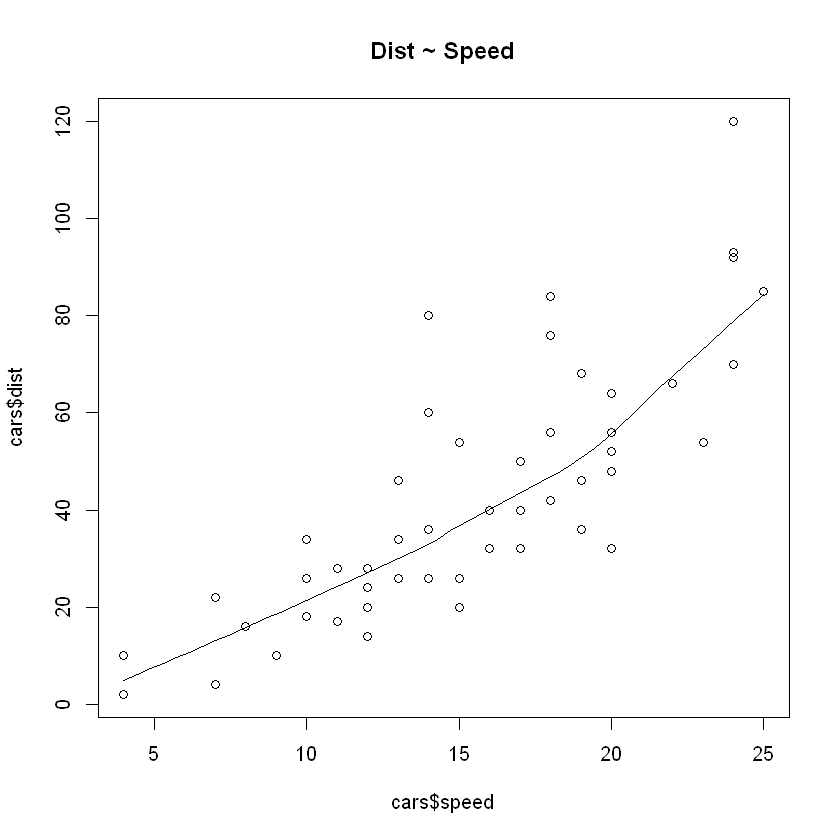

In [165]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")  # scatterplot

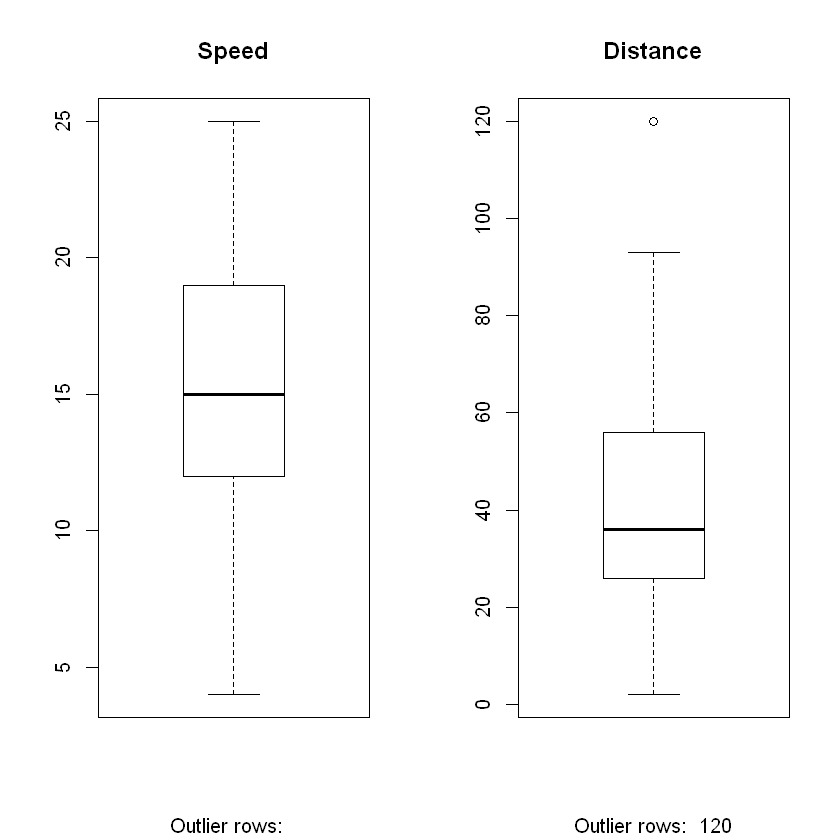

In [166]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'

boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

In [167]:
install.packages('e1071')

Warning message:
"package 'e1071' is in use and will not be installed"

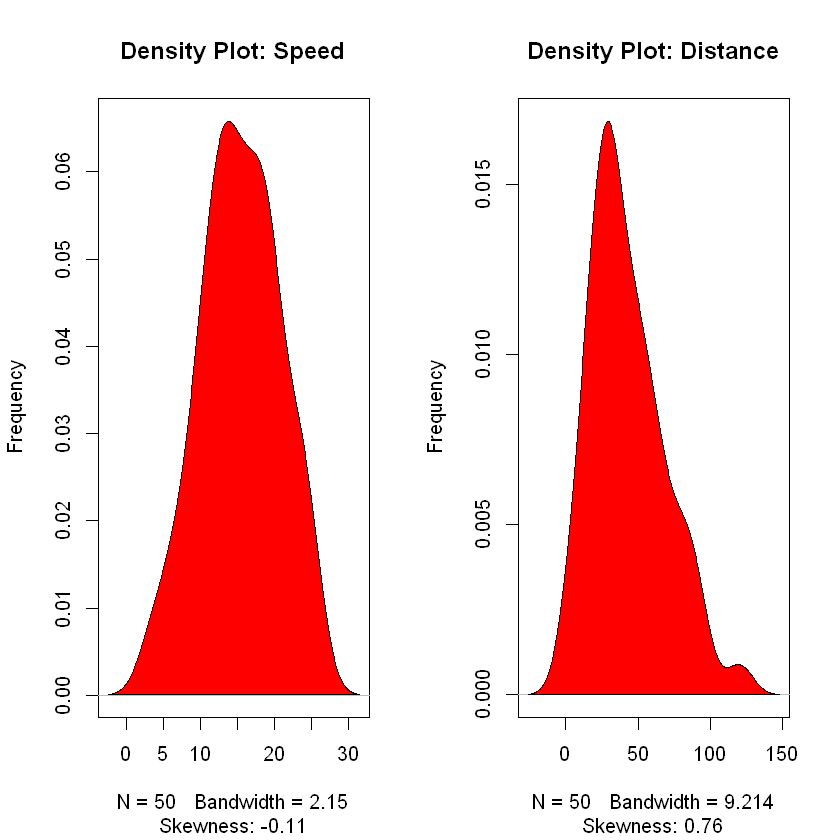

In [168]:
library(e1071)  # for skewness function
par(mfrow=c(1, 2))  # divide graph area in 2 columns

plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))  # density plot for 'speed'

polygon(density(cars$speed), col="red")

plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))  # density plot for 'dist'

polygon(density(cars$dist), col="red")

4. **What is Correlation Analysis?**

Correlation analysis studies the strength of relationship between two continuous variables. It involves computing the correlation coefficient between the the two variables.

So what is correlation? And how is it helpful in linear regression?

1. Correlation is a statistical measure that shows the degree of linear dependence between two variables. In order to compute correlation, the two variables must occur in pairs, just like what we have here with speed and dist. Correlation can take values between `-1 to +1`.


2. If one variables consistently increases with increasing value of the other, then they have a strong positive correlation (value close to +1). Similarly, if one consistently decreases when the other increase, they have a strong negative correlation (value close to -1). A value closer to 0 suggests a weak relationship between the variables.


3. A low correlation (-0.2 < x < 0.2) probably suggests that much of variation of the response variable (Y) is unexplained by the predictor (X). In that case, you should probably look for better explanatory variables.If you observe the cars dataset in the R console, for every instance where speed increases, the distance also increases along with it.That means, there is a strong positive relationship between them. So, the correlation between them will be closer to 1.

However, correlation doesn’t imply causation.

In other words, if two variables have high correlation, it does not mean one variable ’causes’ the value of the other variable to increase.

Correlation is only an aid to understand the relationship. You can only rely on logic and business reasoning to make that judgement.

`So, how to compute correlation in R?`

Simply use the cor() function with the two numeric variables as arguments.

In [169]:
cor(cars$speed, cars$dist)

[1] 0.8068949

5. **Building the Linear Regression Model**

Now that you have seen the linear relationship pictorially in the scatter plot and through correlation, let’s try building the linear regression model.

The function used for building linear models is **lm()**.

The lm() function takes in two main arguments:

1. Formula
2. Data

The data is typically a data.frame object and the formula is a object of class formula.

But the most common convention is to write out the formula directly as written below.

In [170]:
linearMod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



By building the linear regression model, we have established the relationship between the predictor and response in the form of a mathematical formula.

That is Distance (dist) as a function for speed.

For the above output, you can notice the ‘Coefficients’ part having two components: Intercept: -17.579, speed: 3.932.

These are also called the beta coefficients. In other words,

$$dist = Intercept + (β ∗ speed)$$

6. **Linear Regression Diagnostics**

Now the linear model is built and you have a formula that you can use to predict the dist value if a corresponding speed is known.

Is this enough to actually use this model? NO!

Because, before using a regression model to make predictions, you need to ensure that it is statistically significant. But How do you ensure this?

Lets begin by printing the summary statistics for linearMod.

In [171]:
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


Using p Value To Check For Statistical Significance
The summary statistics above tells us a number of things.

One of them is the model’s p-Value (in last line) and the p-Value of individual predictor variables (extreme right column under ‘Coefficients’).

**The p-Values are very important.**

Because, we can consider a linear model to be statistically significant only when both these p-Values are less than the pre-determined statistical significance level of 0.05.

This can visually interpreted by the significance stars at the end of the row against each X variable.

The more the stars beside the variable’s p-Value, the more significant the variable.

What is the Null and Alternate Hypothesis?
Whenever there is a p-value, there is always a Null and Alternate Hypothesis associated.

##### what is the null hypothesis in this case?

In Linear Regression, the Null Hypothesis (H0) is that the beta coefficients associated with the variables is equal to zero.

The alternate hypothesis (H1) is that the coefficients are not equal to zero. (i.e. there exists a relationship between the independent variable in question and the dependent variable).

##### What is t-value?

We can interpret the t-value something like this. A larger t-value indicates that it is less likely that the coefficient is not equal to zero purely by chance. So, higher the t-value, the better.

Pr(>|t|) or p-value is the probability that you get a t-value as high or higher than the observed value when the Null Hypothesis (the β coefficient is equal to zero or that there is no relationship) is true.
So if the Pr(>|t|) is low, the coefficients are significant (significantly different from zero). If the Pr(>|t|) is high, the coefficients are not significant.

##### What this means to us?

When p Value is less than significance level (< 0.05), you can safely reject the null hypothesis that the co-efficient β of the predictor is zero.

In our case, linearMod, both these p-Values are well below the 0.05 threshold.

So, you can reject the null hypothesis and conclude the model is indeed statistically significant.

It is very important for the model to be statistically significant before you can go ahead and use it to predict the dependent variable. Otherwise, the confidence in predicted values from that model reduces and may be construed as an event of chance.

##### How to calculate the t Statistic and p-Values?
When the model co-efficients and standard error are known, the formula for calculating t Statistic and p-Value is as follows:

$$t−Statistic = {β−coefficient \over Std.Error}$$

In case you want to compute some of the statistics by manual code, the below snippet shows how.

In [172]:
# capture model summary as an object
modelSummary <- summary(linearMod)  

In [173]:
# model coefficients
modelCoeffs <- modelSummary$coefficients  

modelCoeffs

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


In [174]:
# get beta estimate for speed
beta.estimate <- modelCoeffs["speed", "Estimate"]

beta.estimate

[1] 3.932409

In [175]:
# get std.error for speed  
std.error <- modelCoeffs["speed", "Std. Error"]  
std.error

[1] 0.4155128

In [176]:
# calc t statistic
t_value <- beta.estimate/std.error  
t_value

[1] 9.46399

In [177]:
# calc p Value
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))  
p_value

[1] 1.489836e-12

In [178]:
# fstatistic
f_statistic <- linearMod$fstatistic[1]  
f_statistic

NULL

In [179]:
# parameters for model p-value calc
f <- summary(linearMod)$fstatistic
f

value    numdf    dendf 
89.56711  1.00000 48.00000

In [180]:
model_p <- pf(f[1], f[2], f[3], lower=FALSE)
model_p

value 
1.489836e-12

**R-Squared and Adj R-Squared**

The actual information in a data is the total variation it contains, remember?.

What R-Squared tells us is the proportion of variation in the dependent (response) variable that has been explained by this model.

**R SQUARED COMPUTATION**

Remember, the total information in a variable is the amount of variation it contains.

$$ R^{2} = 1 – \frac{RSS}{TSS}$$

where, RSS is the Residual Sum of Squares given by

$$RSS = \sum_{i}^{n} \left( y_{i} – \hat{y_{i}} \right) ^{2}$$
and the Sum of Squared Total is given by
$$TSS = \sum_{i}^{n} \left( y_{i} – \bar{y_{i}} \right) ^{2}$$

Here, y-hat is the fitted value for observation i and y-bar is the mean of Y.

We don’t necessarily discard a model based on a low R-Squared value.

To compare the efficacy of two different regression models, it’s a good practice to use the validation sample to compare the AIC of the two models.

Besides AIC, other evaluation metrics like mean absolute percentage error (MAPE), Mean Squared Error (MSE) and Mean Absolute Error (MAE) can also be used.

Thats about R-Squared. Now what about adjusted R-Squared?

**What is adjusted R-Squared?**

As you add more X variables to your model, the R-Squared value of the new bigger model will always be greater than that of the smaller subset.

Can you imagine why?

This is because, since all the variables in the original model is also present, their contribution to explain the dependent variable will be present in the super-set as well.

Therefore, whatever new variable you add can only add (if not significantly) to the variation that was already explained.

It is here, the adjusted R-Squared value comes to help.

Adjusted R-Squared is formulated such that it penalises the number of terms (read predictors) in your model.

So unlike R-sq, as the number of predictors in the model increases, the adj-R-sq may not always increase.

Therefore when comparing nested models, it is a good practice to compare using adj-R-squared rather than just R-squared.

$$ R^{2}_{adj} = 1 – \frac{MSE}{MST}$$

where, MSE is the mean squared error given by

$$MSE = \frac{RSS}{\left( n-q \right)}$$

and MST is the mean squared total given by

$$MST = \frac{TSS}{\left( n-1 \right)}$$

where, n is the number of observations and q is the number of coefficients in the model.

Therefore, by moving around the numerators and denominators, the relationship between R2 and Radj2 becomes:

$$R^{2}_{adj} = 1 – \left( \frac{\left( 1 – R^{2}\right) \left(n-1\right)}{n-q}\right)$$

##### Standard Error and F-Statistic
Both standard errors and F-statistic are measures of goodness of fit.

$$Std. Error = \sqrt{MSE} = \sqrt{\frac{SSE}{n-q}}$$

$$F-statistic = \frac{MSR}{MSE}$$

where, n is the number of observations, q is the number of coefficients and MSR is the mean square regression, calculated as,

$$MSR=\frac{\sum_{i}^{n}\left( \hat{y_{i} – \bar{y}}\right)}{q-1} = \frac{SST – SSE}{q – 1}$$

The higher the F-Statistic the better it is.


## Training 

In [181]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars))  # row indices for training data
trainingRowIndex

[1] 10 38 48 25 14 44 23 22  6  4 42 34  7 49 18 12  8 36 47  2 19 41 29 20 16
[26] 21 37 26 11 27 31 40 13  1 15 33 35 43 30  9

In [182]:
trainingData <- cars[trainingRowIndex, ]  # model training data
head(trainingData)

,speed,dist
10,11,17
38,19,68
48,24,93
25,15,26
14,12,24
44,22,66


In [183]:
testData  <- cars[-trainingRowIndex, ]   # test data
testData

,speed,dist
3,7,4
5,8,16
17,13,34
24,15,20
28,16,40
32,18,42
39,20,32
45,23,54
46,24,70
50,25,85


In [184]:
# Build the model on training data
lmMod <- lm(dist ~ speed, data=trainingData)  # build the model
lmMod


Call:
lm(formula = dist ~ speed, data = trainingData)

Coefficients:
(Intercept)        speed  
    -20.180        4.258  


In [185]:
distPred <- predict(lmMod, testData)  # predict distance
distPred

3         5        17        24        28        32        39        45 
 9.627845 13.886057 35.177120 43.693545 47.951757 56.468182 64.984607 77.759245 
       46        50 
82.017457 86.275670

In [186]:
summary (lmMod)


Call:
lm(formula = dist ~ speed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.726 -11.242  -2.564  10.436  40.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.1796     7.8254  -2.579   0.0139 *  
speed         4.2582     0.4947   8.608 1.85e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.49 on 38 degrees of freedom
Multiple R-squared:  0.661,	Adjusted R-squared:  0.6521 
F-statistic: 74.11 on 1 and 38 DF,  p-value: 1.848e-10


In [187]:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))  # make actuals_predicteds dataframe.
actuals_preds

,actuals,predicteds
3,4,9.627845
5,16,13.886057
17,34,35.177120
24,20,43.693545
28,40,47.951757
32,42,56.468182
39,32,64.984607
45,54,77.759245
46,70,82.017457
50,85,86.275670


In [188]:
correlation_accuracy <- cor(actuals_preds)  # 90.2%
correlation_accuracy

,actuals,predicteds
actuals,1.0000000,0.9029504
predicteds,0.9029504,1.0000000


In [189]:
head(actuals_preds)

,actuals,predicteds
3,4,9.627845
5,16,13.886057
17,34,35.177120
24,20,43.693545
28,40,47.951757
32,42,56.468182


In [190]:
# Min-Max Accuracy Calculation
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))
min_max_accuracy

[1] 0.7311131

In [191]:
# MAPE Calculation
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)  
mape

[1] 0.4959096

In [192]:
## Here's the data from the video
mouse.data <- data.frame(
  weight=c(0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3),
  size=c(1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3))

mouse.data # print the data to the screen in a nice format

weight,size
0.9,1.4
1.8,2.6
2.4,1.0
3.5,3.7
3.9,5.5
4.4,3.2
5.1,3.0
5.6,4.9
6.3,6.3


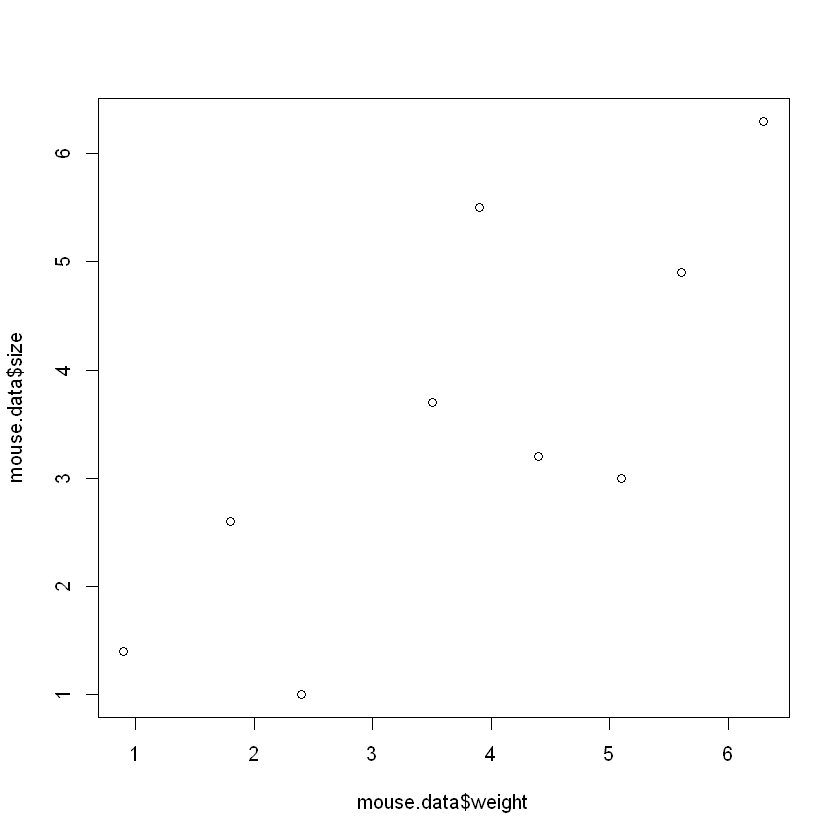

In [193]:
## plot a x/y scatter plot with the data
plot(mouse.data$weight, mouse.data$size)

In [194]:
## create a "linear model" - that is, do the regression
mouse.regression <- lm(size ~ weight, data=mouse.data)
mouse.regression


Call:
lm(formula = size ~ weight, data = mouse.data)

Coefficients:
(Intercept)       weight  
     0.5813       0.7778  


In [195]:
## generate a summary of the regression
summary(mouse.regression)


Call:
lm(formula = size ~ weight, data = mouse.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5482 -0.8037  0.1186  0.6186  1.8852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.5813     0.9647   0.603   0.5658  
weight        0.7778     0.2334   3.332   0.0126 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.19 on 7 degrees of freedom
Multiple R-squared:  0.6133,	Adjusted R-squared:  0.558 
F-statistic:  11.1 on 1 and 7 DF,  p-value: 0.01256


weight,size
0.9,1.4
1.8,2.6
2.4,1.0
3.5,3.7
3.9,5.5
4.4,3.2
5.1,3.0
5.6,4.9
6.3,6.3



Call:
lm(formula = size ~ weight, data = mouse.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5482 -0.8037  0.1186  0.6186  1.8852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.5813     0.9647   0.603   0.5658  
weight        0.7778     0.2334   3.332   0.0126 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.19 on 7 degrees of freedom
Multiple R-squared:  0.6133,	Adjusted R-squared:  0.558 
F-statistic:  11.1 on 1 and 7 DF,  p-value: 0.01256


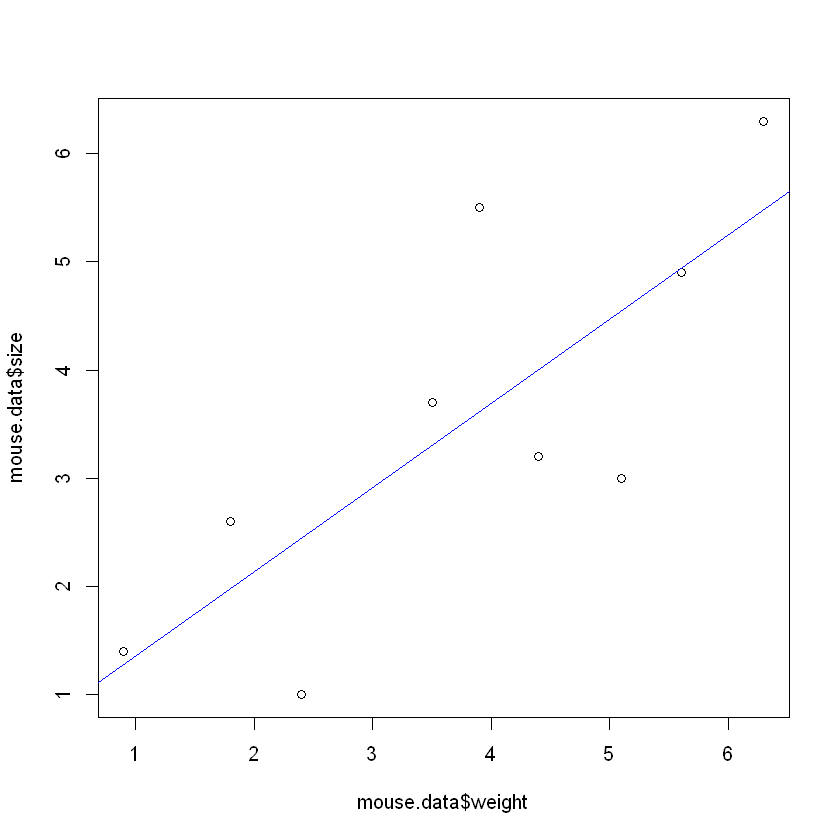

In [196]:
mouse.data <- data.frame(
  weight=c(0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3),
  size=c(1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3))

mouse.data # print the data to the screen in a nice format

## plot a x/y scatter plot with the data
plot(mouse.data$weight, mouse.data$size)

## create a "linear model" - that is, do the regression
mouse.regression <- lm(size ~ weight, data=mouse.data)
## generate a summary of the regression
summary(mouse.regression)

## add the regression line to our x/y scatter plot
abline(mouse.regression, col="blue")

In [197]:
Data <- read.csv('DataSets//FuelConsumption.csv')
head(Data)

MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


In [198]:
tail(Data)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1064,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1066,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1067,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [199]:
summary(Data)

   MODELYEAR               MAKE              MODEL              VEHICLECLASS
 Min.   :2014   FORD         : 90   F150 FFV    :   8   MID-SIZE      :178  
 1st Qu.:2014   CHEVROLET    : 86   F150 FFV 4X4:   8   COMPACT       :172  
 Median :2014   BMW          : 64   ACCORD      :   6   SUV - SMALL   :154  
 Mean   :2014   MERCEDES-BENZ: 59   BEETLE      :   6   SUV - STANDARD:110  
 3rd Qu.:2014   AUDI         : 49   FOCUS FFV   :   6   FULL-SIZE     : 86  
 Max.   :2014   GMC          : 49   MUSTANG     :   5   TWO-SEATER    : 71  
                (Other)      :670   (Other)     :1028   (Other)       :296  
   ENGINESIZE      CYLINDERS       TRANSMISSION FUELTYPE FUELCONSUMPTION_CITY
 Min.   :1.000   Min.   : 3.000   A6     :222   D: 27    Min.   : 4.60       
 1st Qu.:2.000   1st Qu.: 4.000   AS6    :189   E: 92    1st Qu.:10.25       
 Median :3.400   Median : 6.000   M6     :141   X:514    Median :12.60       
 Mean   :3.346   Mean   : 5.795   A8     : 87   Z:434    Mean   :13.30  

In [200]:
library(ggplot2)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


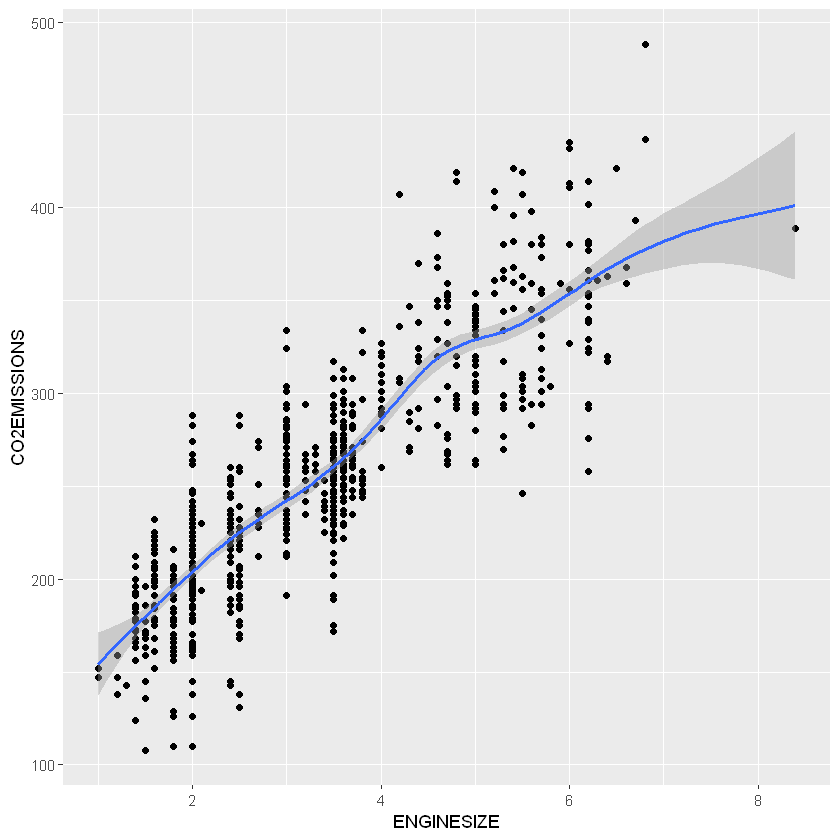

In [201]:
ggplot(Data, aes(x =ENGINESIZE , y=CO2EMISSIONS ))+
geom_point()+stat_smooth()

In [202]:
cor(Data$ENGINESIZE,Data$CO2EMISSIONS)

[1] 0.8741544

In [203]:
cor(Data$CYLINDERS,Data$CO2EMISSIONS)

[1] 0.8496846

In [204]:
cor(Data$FUELCONSUMPTION_CITY,Data$CO2EMISSIONS)

[1] 0.8980385

In [205]:
cor(Data$FUELCONSUMPTION_HWY,Data$CO2EMISSIONS)

[1] 0.8617479

In [206]:
cor(Data$FUELCONSUMPTION_COMB,Data$CO2EMISSIONS)

[1] 0.8921286

In [207]:
cor(Data$FUELCONSUMPTION_COMB_MPG,Data$CO2EMISSIONS)

[1] -0.9063942

In [208]:
model <- lm(FUELCONSUMPTION_CITY ~ CO2EMISSIONS, data=Data)
model


Call:
lm(formula = FUELCONSUMPTION_CITY ~ CO2EMISSIONS, data = Data)

Coefficients:
 (Intercept)  CO2EMISSIONS  
    -1.59501       0.05812  


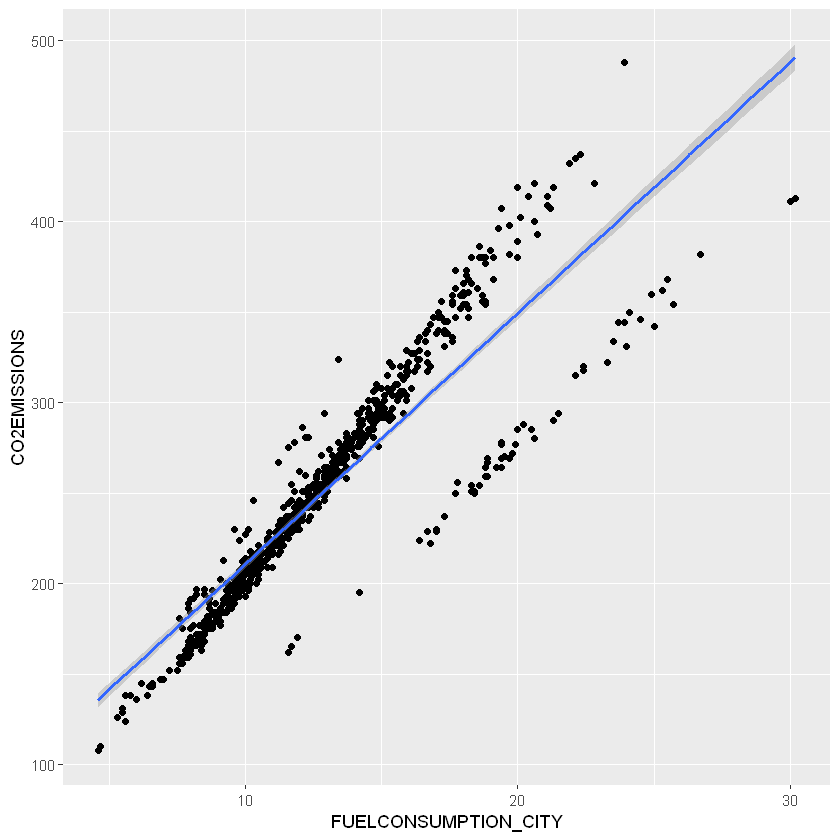

In [209]:
ggplot(Data, aes(x =FUELCONSUMPTION_CITY  , y=CO2EMISSIONS ))+
geom_point()+stat_smooth(method = lm)

In [210]:
summary(model)


Call:
lm(formula = FUELCONSUMPTION_CITY ~ CO2EMISSIONS, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8353 -0.7307 -0.3585 -0.0406  7.7922 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5950139  0.2302616  -6.927 7.43e-12 ***
CO2EMISSIONS  0.0581182  0.0008724  66.619  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.805 on 1065 degrees of freedom
Multiple R-squared:  0.8065,	Adjusted R-squared:  0.8063 
F-statistic:  4438 on 1 and 1065 DF,  p-value: < 2.2e-16


1. **call:** It show the funcation call used to  compute the regression Model


2. **Residuals:** Provide a quick view of the distribution of the Residuals which is defined have a mean zero. and therefore the median should not be far from zero and the minimum and max should be equal are absolutr values.


3. **Coefficients:** it shows the regression beta coefficients and their statistical significience. predictors variables that are significantly associated to the outcome variables.


4. **Residual standard error(RSE) or R-Squared or F-statistic:** used to find the metrics that are used to check how well the modle fits to our data

In [211]:
sigma(model)*100/mean(Data$CO2EMISSIONS)   # error is 70

[1] 0.7044712

In [212]:
confint(model)

,2.5 %,97.5 %
(Intercept),-2.04683178,-1.14319594
CO2EMISSIONS,0.05640638,0.05982999


### Multiple Linear Regression

Multiple regression is an extension of linear regression into relationship between more than two variables. In simple linear relation we have one predictor and one response variable, but in multiple regression we have more than one predictor variable and one response variable.

$y = a + b_1x_1 + b_2x_2 +...b_nx_n$

Following is the description of the parameters used −

1. y is the response variable.

2. a, b1, b2...bn are the coefficients.

3. x1, x2, ...xn are the predictor variables.

We create the regression model using the lm() function in R. The model determines the value of the coefficients using the input data. Next we can predict the value of the response variable for a given set of predictor variables using these coefficients.

In [17]:
# Load the package that contains the full dataset.
# We'll use corrplot later on in this example too.
# This library will allow us to show multivariate graphs.

In [2]:
Data <- read.csv('DataSets/FuelConsumption.csv')
head(Data)

MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


In [14]:
input <- Data[,c("ENGINESIZE",
                 "CYLINDERS",
                 "FUELCONSUMPTION_CITY",
                 "FUELCONSUMPTION_HWY",
                 "FUELCONSUMPTION_COMB",
                 "FUELCONSUMPTION_COMB_MPG",
                 'CO2EMISSIONS')]
print(head(input))

  ENGINESIZE CYLINDERS FUELCONSUMPTION_CITY FUELCONSUMPTION_HWY
1        2.0         4                  9.9                 6.7
2        2.4         4                 11.2                 7.7
3        1.5         4                  6.0                 5.8
4        3.5         6                 12.7                 9.1
5        3.5         6                 12.1                 8.7
6        3.5         6                 11.9                 7.7
  FUELCONSUMPTION_COMB FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
1                  8.5                       33          196
2                  9.6                       29          221
3                  5.9                       48          136
4                 11.1                       25          255
5                 10.6                       27          244
6                 10.0                       28          230


In [18]:
# Create the relationship model.
model <- lm(CO2EMISSIONS ~ ENGINESIZE + 
            CYLINDERS + FUELCONSUMPTION_CITY 
            +FUELCONSUMPTION_HWY + FUELCONSUMPTION_COMB + 
            FUELCONSUMPTION_COMB_MPG, data = input)

# Show the model.
model


Call:
lm(formula = CO2EMISSIONS ~ ENGINESIZE + CYLINDERS + FUELCONSUMPTION_CITY + 
    FUELCONSUMPTION_HWY + FUELCONSUMPTION_COMB + FUELCONSUMPTION_COMB_MPG, 
    data = input)

Coefficients:
             (Intercept)                ENGINESIZE                 CYLINDERS  
                 253.531                     8.578                     7.699  
    FUELCONSUMPTION_CITY       FUELCONSUMPTION_HWY      FUELCONSUMPTION_COMB  
                 -10.593                    -3.489                    17.753  
FUELCONSUMPTION_COMB_MPG  
                  -3.869  


In [41]:
# Get the Intercept and coefficients as vector elements.
cat("# # # # The Coefficient Values # # # ","\n")

b <- coef(model)[1]
b

# # # # The Coefficient Values # # #  


(Intercept) 
   253.5312

In [29]:
En_size <- coef(model)[2]
En_size

ENGINESIZE 
  8.577673

In [27]:
Xhp <- coef(model)[3]
Xhp

CYLINDERS 
 7.698747

In [31]:
Xwt <- coef(model)[4]
Xwt

FUELCONSUMPTION_CITY 
           -10.59262

In [34]:
FUEL_HWY <-coef(model)[5]
FUEL_HWY

FUELCONSUMPTION_HWY 
          -3.489183

In [36]:
FUEL_COMB<-coef(model)[6]
FUEL_COMB

FUELCONSUMPTION_COMB 
            17.75286

In [39]:
FUEL_COMB_MPG<- coef(model)[7]
FUEL_COMB_MPG

FUELCONSUMPTION_COMB_MPG 
               -3.869243

<h1 align= center>  $y = b_0+b_1x_1+b_2x_2+.........+b_nx_n$ </h1>

In [42]:
En_size_1 = 2
CYL_Size = 4
FUELCC = 9.9
FUELCH =6.7
FCC = 8.5
FCCM= 33

In [45]:
CO2 = b + En_size*En_size_1 + Xhp*CYL_Size + Xwt*FUELCC + FUEL_HWY*FUELCH + FUEL_COMB*FCC + FUEL_COMB_MPG*FCCM
CO2

(Intercept) 
   196.4513

In [47]:
Acc = 196

Error = Acc-CO2
Error

(Intercept) 
 -0.4513437